In [1]:
import pandas as pd
import numpy as np

Загрузим данные с https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page за декабрь 2019 года и январь 2020 года, затем обединим их в один датафрейм.

In [2]:
df_1 = pd.read_csv('data\\yellow_tripdata_2019-12.csv')
df_1.head()

d:\work\citymobile\.venv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896317 entries, 0 to 6896316
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 947.1+ MB


In [3]:
df_2 = pd.read_csv('data\\yellow_tripdata_2020-01.csv')
df_2.head()

d:\work\citymobile\.venv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df = pd.concat([df_1, df_2], ignore_index=True)
del df_1, df_2

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df.loc[df['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0
df.loc[df['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13301325 entries, 0 to 13301324
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2)

In [5]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).astype('timedelta64[m]').astype(np.float32)
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)
df.loc[:, 'VendorID':'congestion_surcharge'] = df.loc[:, 'VendorID':'congestion_surcharge'].astype(np.float32)

df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,1.0,4.2,1.0,0.0,142.0,116.0,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.299999,2.5,14.0
1,1.0,1.0,0.0,1.0,0.0,145.0,145.0,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.800000,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,145.0,145.0,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.800000,0.0,0.0
3,1.0,2.0,9.4,1.0,0.0,138.0,25.0,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.799999,0.0,21.0
4,1.0,2.0,1.6,1.0,0.0,161.0,237.0,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.800000,2.5,11.0


Проверим какое количество данных заполненно неверно или частично.

In [6]:
df.isna().sum()

VendorID                 116459
passenger_count          116459
trip_distance                 0
RatecodeID               116459
store_and_fwd_flag       116459
PULocationID                  0
DOLocationID                  0
payment_type             116459
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
duration                      0
dtype: int64

Всего 116 тыс из 13 млн сэмплов содержат NaN значения. Для решения тествой задачи можно отбросить их и использовать оставшиеся данные. Другой вариант, можно заменить NaN значения в соответствии с данными. Например, в столбце passanger_count можно заменить на среднее значение пассажиров или на медиану. В столбце payment_type можно использовать наиболее часто встречаемое значение, столбцы с ID можно заполнить уникальными idшниками.

In [6]:
df.dropna(axis=0, how='any', inplace=True)

# Как стоимость поездки скоррелирована с другими факторами?

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

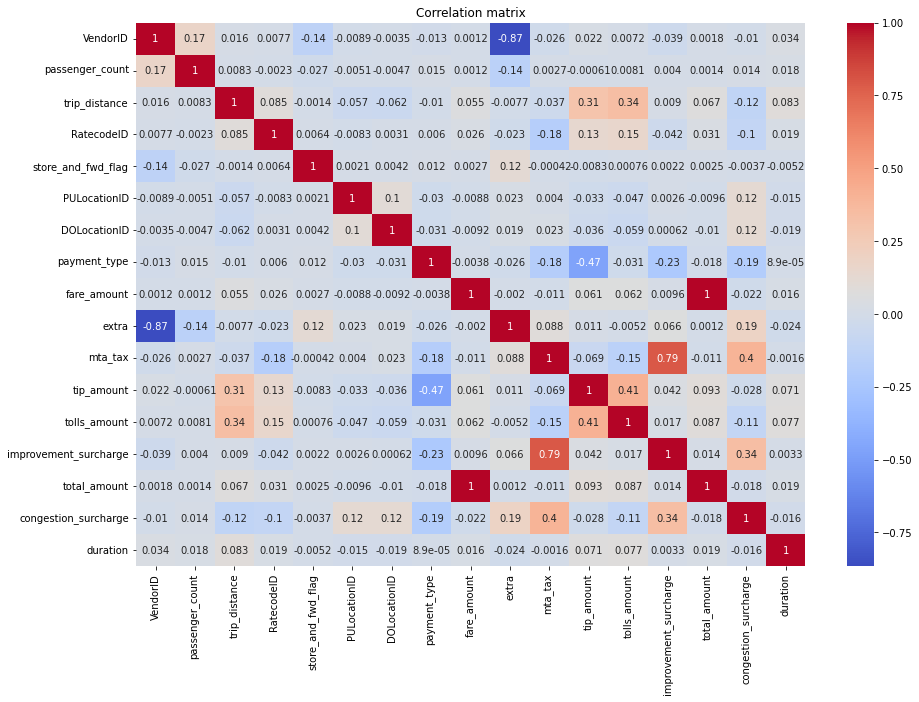

In [9]:
fig = plt.figure(figsize = (15, 10))

plt.title('Correlation matrix')

sns.heatmap(df.corr(method='pearson'), cmap = 'coolwarm', annot = True, annot_kws = {'fontsize' : 10})

plt.show()

Для ответа на вопрос, можно посмотреть на строку (столбец) total amount. Наибольшее значение коэффициента корреляции Пирсона между total amount и fare_amount (1), в этой переменной указано значение стоимости поездки, которая рассчитывалась по таксометру. Коэффициент корреляции между этими признаками равен 1, что вполне резонно, так как полная стоимость поездки вполне естественно должна зависить от киллометража и времени поездки, которые учитываются в таксометре при расчете (принцип рпботы таксометра можно найти на вкипедии, что я и сделал). И в основном, базовая стоимость поездки определяется таксометром, но может изменяться в зависимости от стоимости подачи, района назначения и старта, чаевых. 

Следующими по абсолютному значению коэффициента корреляций являются столбцы с количеством чаевых (tip amount) и общей суммой оплаченных сборов (tolls amount). Это естественно, что полная стоимость поездки задается как некоторое взвешенное от базового тарифа (расчет таксометра), сборов (подача машины, район старта и конца поездки, времени суток) и чаевых. И тип зависимости может быть нелинейным, но монотонно неубывающим.  

# Найдите аномальные поездки. Почему именно эти поездки вы считаете аномальными?

Первое что приходит в голову - это убрать поездки с длительностью менее минуты. Скорее всего это отмененные заказы или ошибка в заполнении данных. Аналогично можно придумать как выделить аномальные поездки по другим признакам, например, поездка наалась и закончилась в одном и том же месте (скорее всего водитель просто ожидал, а заказ был отменен).

In [12]:
print(f'число аномальных поезок с длительностью менее 1 минуты = {(df.duration == 0).sum()}')

число аномальных поезок с длительностью менее 1 минуты = 140973


In [7]:
df.drop(df[df.duration == 0].index, inplace=True)

Так как датасет содержит признаки разного типа, и у нас нету примеров аномальных поездок, то стоит попробовать алгоритм изолирующего леса, так как хорошо зарекомендовал себя в таких задачах. Isolation Forest – это одна из вариаций идеи случайного леса. 

Логика алгоритма: при описанном «случайном» способе построения деревьев выбросы будут попадать в листья на ранних этапах (на небольшой глубине дерева), т.е. выбросы проще «изолировать».

Так как данных достаточно не мало, а я считаю на ноутбуке, то разобьем выборку на train и test с test = 0.8 df. 

In [8]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [9]:
y = df['total_amount']
X = df.drop('total_amount', axis=1)

X.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,duration
0,1.0,1.0,4.2,1.0,0.0,142.0,116.0,2.0,14.5,3.0,0.5,0.0,0.0,0.3,2.5,14.0
3,1.0,2.0,9.4,1.0,0.0,138.0,25.0,1.0,28.5,0.5,0.5,10.0,0.0,0.3,0.0,21.0
4,1.0,2.0,1.6,1.0,0.0,161.0,237.0,2.0,9.0,3.0,0.5,0.0,0.0,0.3,2.5,11.0
5,1.0,2.0,1.0,1.0,0.0,161.0,230.0,2.0,6.5,3.0,0.5,0.0,0.0,0.3,2.5,9.0
6,1.0,0.0,1.7,1.0,1.0,164.0,163.0,2.0,10.0,3.0,0.5,0.0,0.0,0.3,2.5,12.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241, shuffle=True)

In [11]:
clf = IsolationForest(random_state=241, verbose=False, bootstrap=True, n_jobs=-1)
clf.fit(X_train)

IsolationForest(bootstrap=True, n_jobs=-1, random_state=241, verbose=False)

In [12]:
clf.predict(X_train)

array([ 1,  1,  1, ..., -1,  1,  1])

Третий элемент с конца в выборке для обучения определился как выброс. Посмотрим на него.

In [21]:
X_train.keys()

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'duration'],
      dtype='object')

In [18]:
X_train.values[-3]

array([ 2. ,  3. ,  0.5,  1. ,  0. , 41. , 42. ,  2. ,  5. ,  1. ,  0.5,
        0. ,  0. ,  0.3,  0. ,  5. ], dtype=float32)

Поездка длилась 5 минут и Id районов начала и конца поездки показывают, что это соседние районы. Расстояние поездки равно половине мили. Возможно это поездка также не состоялась а заказ был не сразу отменен.

In [22]:
outliers_mask = clf.predict(X_train)
X_train[outliers_mask == -1]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,duration
6943804,1.0,3.0,9.40,1.0,0.0,80.0,236.0,1.0,30.5,3.0,0.5,3.43,0.00,0.3,2.5,31.0
614242,2.0,5.0,4.36,1.0,0.0,13.0,230.0,1.0,16.0,0.5,0.5,4.95,0.00,0.3,2.5,16.0
5658430,2.0,1.0,0.55,1.0,0.0,33.0,33.0,2.0,4.0,0.0,0.5,0.00,0.00,0.3,0.0,2.0
1158430,2.0,1.0,10.08,1.0,0.0,249.0,95.0,1.0,30.0,0.5,0.5,5.00,6.12,0.3,2.5,27.0
8855440,1.0,1.0,5.80,1.0,0.0,237.0,13.0,2.0,24.0,2.5,0.5,0.00,0.00,0.3,2.5,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525427,2.0,2.0,5.38,5.0,0.0,161.0,265.0,1.0,60.0,0.0,0.5,5.00,0.00,0.3,2.5,21.0
2041681,1.0,0.0,2.20,1.0,0.0,234.0,50.0,2.0,15.0,3.5,0.5,0.00,0.00,0.3,2.5,22.0
5830616,1.0,1.0,19.40,2.0,0.0,140.0,132.0,2.0,52.0,2.5,0.5,0.00,6.12,0.3,2.5,27.0
10048419,2.0,5.0,2.40,1.0,0.0,33.0,49.0,1.0,11.0,0.5,0.5,1.50,0.00,0.3,0.0,12.0


In [23]:
X_train.shape

(2608778, 16)

Из двух с половиной миллионов поездок, около 300 тыс были выделены как выбросы. Применим алгоритм выявления выбросов ко всем данным и удалим их из нашей выборки. (Понимаю, что странно обучаться на 20% данных и удалять потом по обученному алгоритму, но для моего ноутбука такиеразмеры файлов слишком велики, работаем с тем, что есть.)

In [24]:
outliers_mask = clf.predict(X)
X = X.drop(X[outliers_mask == -1], axis=0)
y = y.drop(y[outliers_mask == -1], axis=0)

# Постройте распределение по стоимости поездок. Проверьте гипотезу о том, что оно имеет нормальное распределение. Как вы можете это объяснить?

In [39]:
sns.displot(y_train)

KeyboardInterrupt: 

# Из данных постройте модель, которая описывает тариф

# Используя модель из пункта выше ответьте на вопрос: были ли в какие-то дни (или временные промежутки) скидки или акции? И если то были, то как вы можете это объяснить.